In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum() #Checking for duplicated rows. As this dataset has 0 duplicate rows.

np.int64(0)

In [ ]:
df.isnull().sum() #Checking for null values. As this dataset has 0 null values.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

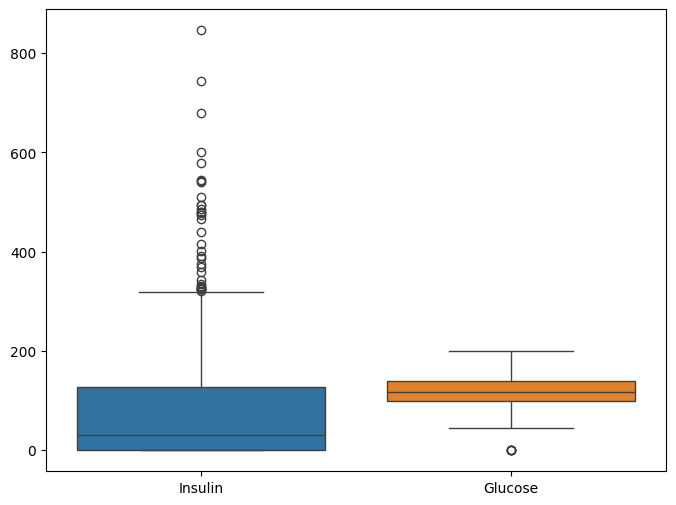

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df[['Insulin', 'Glucose']]) #Box plots used for outliers

<Axes: xlabel='Glucose', ylabel='Count'>

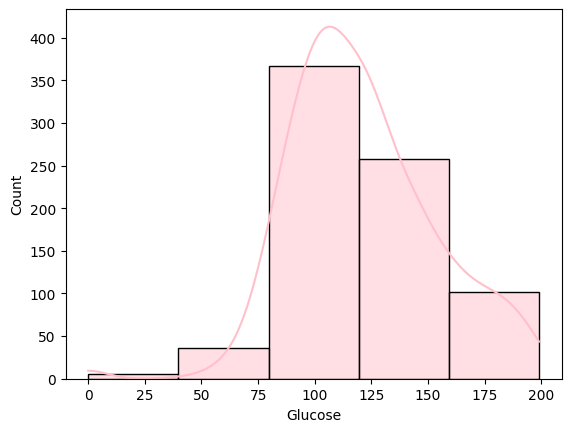

In [ ]:
sns.histplot(data = df, x = 'Glucose', bins = 5, kde = True, color = 'pink') #Horizontally oriented histogram

In [ ]:
print((df[['Glucose','Insulin','BloodPressure','SkinThickness','BMI']] == 0).sum())

Glucose            5
Insulin          374
BloodPressure     35
SkinThickness    227
BMI               11
dtype: int64


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.drop('Insulin', axis = 1, inplace = True) #Dropped the column Insulin as nearly 50% of the column was 0.

KeyError: "['Insulin'] not found in axis"

In [ ]:
df.drop('SkinThickness', axis = 1, inplace = True) #Dropped the column SkinThickness as nearly 30% of the column was 0.

In [ ]:
print((df['DiabetesPedigreeFunction'] == 0).sum())

0


In [ ]:
#Now that we have dropped all the columns which had a major portion of values as 0.
#We will use Imputation techniques to fill the fill the values.
columns_to_impute = ['Glucose', 'BloodPressure', 'BMI']

df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

In [ ]:
#Filling in the NaN values with Median
for cols in columns_to_impute:
    median_val = df[cols].median()
    df.fillna({cols: median_val}, inplace = True)

In [ ]:
print((df[['Glucose','BloodPressure','BMI']] == 0).sum()) #Imputation done successfully !!

Glucose          0
BloodPressure    0
BMI              0
dtype: int64


<Axes: >

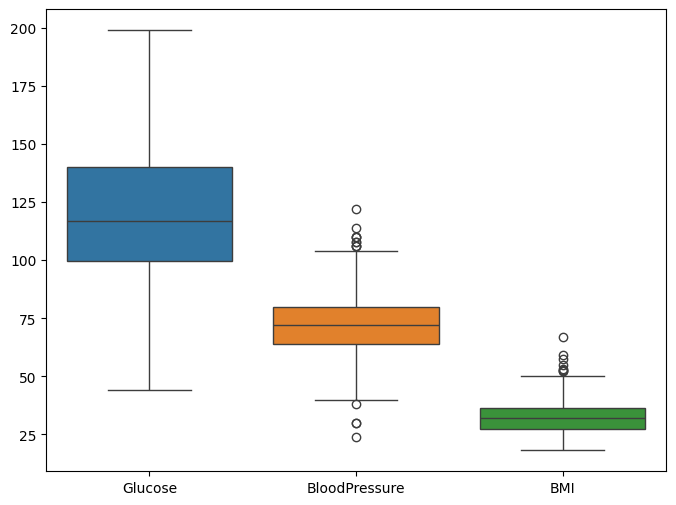

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df[['Glucose','BloodPressure','BMI']]) #Identifying Outliers

In [ ]:

df.to_csv('/content/drive/MyDrive/cleaned_diabetes_data.csv', index = False)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/cleaned_diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [4]:
#According to the above box plot there is a lot of outliers in BloodPressure/BMI which could be possible because of error in data entry.
def cap_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #capping the outliers
    df[column] = np.where(df[column] > upper_bound , upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound , lower_bound, df[column])

cap_outlier_iqr(df, 'BloodPressure')
cap_outlier_iqr(df, 'BMI')

<Axes: >

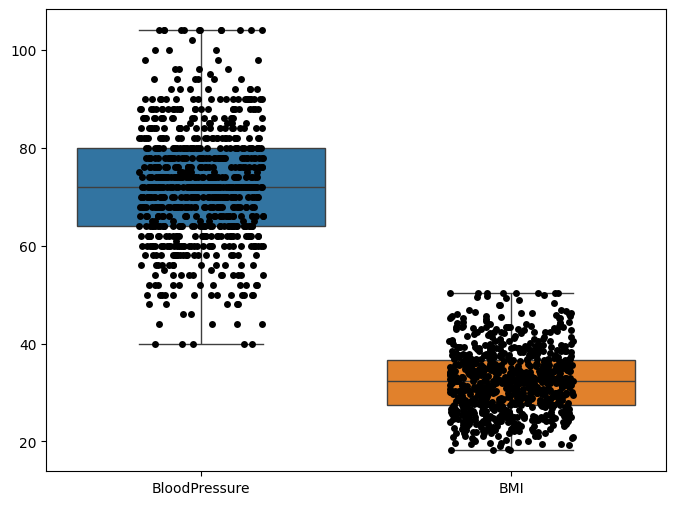

In [11]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df[['BloodPressure','BMI']])
sns.stripplot(data = df[['BloodPressure','BMI']], jitter = 0.2, color = 'black') #Now the outliers have been handled.

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop('Outcome', axis = 1) #Features
y = df['Outcome'] #Target

In [19]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [50]:
joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')

['/content/drive/MyDrive/scaler.pkl']

In [23]:
X_scaled = scaler.transform(X)
X_scaled #Data is standardised.

array([[ 0.63994726,  0.86604475, -0.03063207,  0.18109219,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.20506583, -0.54391414, -0.8694653 , -0.36506078,
        -0.19067191],
       [ 1.23388019,  2.01666174, -0.71500816, -1.36472812,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03063207, -0.92949716, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.14279979, -1.05719621, -0.34418655, -0.37110101,
         1.17073215],
       [-0.84488505, -0.94206766, -0.20172609, -0.29916266, -0.47378505,
        -0.87137393]])

<Axes: >

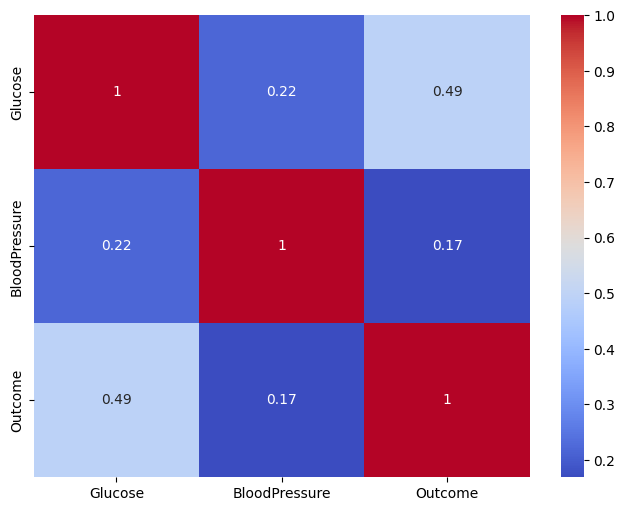

In [26]:
#Let's see a heatmap.
combined_df = df[['Glucose','BloodPressure', 'Outcome']].corr()

plt.figure(figsize = (8,6))
sns.heatmap(combined_df, annot = True, cmap = 'coolwarm')


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [31]:
print(df['Outcome'].value_counts()) # The dataset seems imbalanced

Outcome
0    500
1    268
Name: count, dtype: int64


In [32]:
!pip install imbalanced_learn

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts()) #Oversampling done .

Outcome
0    401
1    401
Name: count, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(random_state = 42)

In [40]:
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [43]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [45]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"The AUC Score for your model is: {auc_score:.2f}")

The AUC Score for your model is: 0.83


In [48]:
import joblib


joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [49]:
file_path = '/content/drive/MyDrive/diabetes_model.pkl'


joblib.dump(model, file_path)

print(f"Model successfully saved to {file_path}")

Model successfully saved to /content/drive/MyDrive/diabetes_model.pkl
